In [1]:
import numpy as np
import matplotlib.pyplot as plt
import anacal
from deep_anacal import simulate, utils, deep_anacal
%load_ext autoreload
%autoreload 2

In [2]:
seed = 123
ngrid = 64
scale = 0.2

def compute_radial_profile(power_spectrum):
    y, x = np.indices(power_spectrum.shape)
    center = (ngrid/2, ngrid/2)
    r = np.sqrt((x - center[1])**2 + (y - center[0])**2)
    r = r.astype(int)
    radial_sum = np.bincount(r.ravel(), power_spectrum.ravel())
    radial_count = np.bincount(r.ravel())
    radial_profile = radial_sum / (radial_count + 1e-10)
    return r, radial_profile

# When $\sigma_h >$ fwhm of both PSFs

Text(0, 0.5, 'PS Fractional Difference')

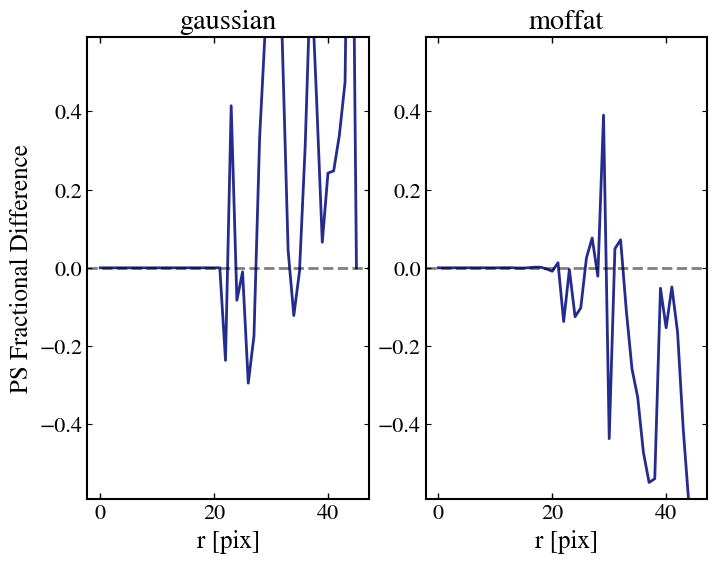

In [3]:
sigma_arcsec = 0.52
fwhm_w = 0.9
fwhm_d = 0.7

fig, axs = plt.subplots(ncols=2, figsize=(8, 6))
for ax, psf_name in zip(axs, ["gaussian", "moffat"]):
    sim = simulate.sim_wide_deep(
        seed=seed, ngrid=ngrid, nstamp=1, scale=scale, flux=1,
        fwhm_w=fwhm_w, fwhm_d=fwhm_d, psf_name=psf_name
    )

    sigma_arcsec = deep_anacal.get_max_smooth_scale(fwhm_w=fwhm_w, fwhm_d=fwhm_d, fpfs_config=sigma_arcsec)

    fpfs_config = anacal.fpfs.FpfsConfig(sigma_arcsec=sigma_arcsec)
    task = anacal.fpfs.FpfsTask(
        npix=fpfs_config.npix, pixel_scale=scale, sigma_arcsec=fpfs_config.sigma_arcsec,
        noise_variance=1e-3, kmax_thres=fpfs_config.kmax_thres)

    radial_profile = []
    for field in ['w', 'd']:
        fpfsI = anacal.fpfs.FpfsImage(
            nx=ngrid, ny=ngrid, scale=scale, sigma_arcsec=sigma_arcsec,
            klim=task.kmax / scale,
            psf_array=sim['psf_'+field]
        )
        smooth_image = fpfsI.smooth_image(gal_array=sim['gal_'+field])
        ps_image = np.abs(np.fft.fftshift(np.fft.fft2(smooth_image)))
        radial_profile.append(compute_radial_profile(ps_image)[1])
    ax.plot(np.arange(radial_profile[0].shape[0]), radial_profile[0] / radial_profile[1] - 1)
    ax.set_xlabel('r [pix]')
    ax.set_ylim(-0.59, 0.59)
    ax.axhline(c='k', ls='--', alpha=0.5)
    ax.set_title(psf_name)
axs[0].set_ylabel('PS Fractional Difference')

# When fwhm of wide is > all sizes

Text(0, 0.5, 'PS Fractional Difference')

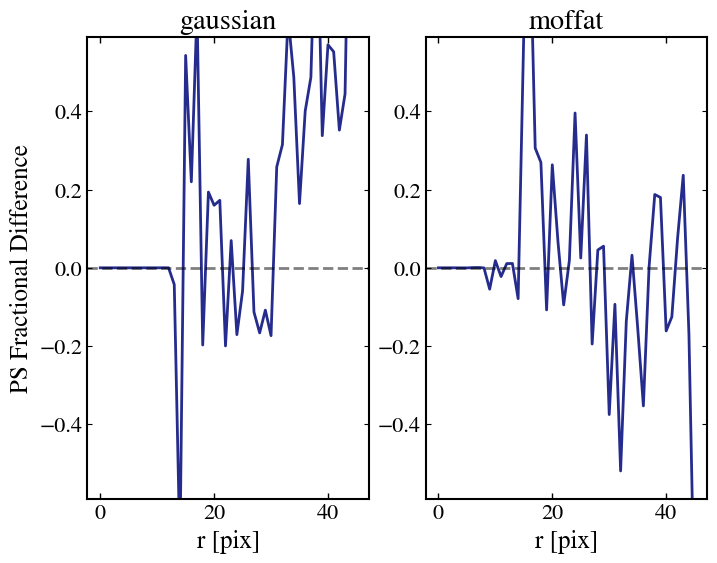

In [4]:
sigma_arcsec = 0.52
fwhm_w = 1.7
fwhm_d = 0.7

fig, axs = plt.subplots(ncols=2, figsize=(8, 6))
for ax, psf_name in zip(axs, ["gaussian", "moffat"]):
    sim = simulate.sim_wide_deep(
        seed=seed, ngrid=ngrid, nstamp=1, scale=scale, flux=1,
        fwhm_w=fwhm_w, fwhm_d=fwhm_d, psf_name=psf_name
    )

    sigma_arcsec = deep_anacal.get_max_smooth_scale(fwhm_w=fwhm_w, fwhm_d=fwhm_d, fpfs_config=sigma_arcsec)

    fpfs_config = anacal.fpfs.FpfsConfig(sigma_arcsec=sigma_arcsec)
    task = anacal.fpfs.FpfsTask(
        npix=fpfs_config.npix, pixel_scale=scale, sigma_arcsec=fpfs_config.sigma_arcsec,
        noise_variance=1e-3, kmax_thres=fpfs_config.kmax_thres)

    radial_profile = []
    for field in ['w', 'd']:
        fpfsI = anacal.fpfs.FpfsImage(
            nx=ngrid, ny=ngrid, scale=scale, sigma_arcsec=sigma_arcsec,
            klim=task.kmax / scale,
            psf_array=sim['psf_'+field]
        )
        smooth_image = fpfsI.smooth_image(gal_array=sim['gal_'+field])
        ps_image = np.abs(np.fft.fftshift(np.fft.fft2(smooth_image)))
        radial_profile.append(compute_radial_profile(ps_image)[1])
    ax.plot(np.arange(radial_profile[0].shape[0]), radial_profile[0] / radial_profile[1] - 1)
    ax.set_xlabel('r [pix]')
    ax.set_ylim(-0.59, 0.59)
    ax.axhline(c='k', ls='--', alpha=0.5)
    ax.set_title(psf_name)
axs[0].set_ylabel('PS Fractional Difference')

# With anisotrpic PSF

Text(0, 0.5, 'PS Fractional Difference')

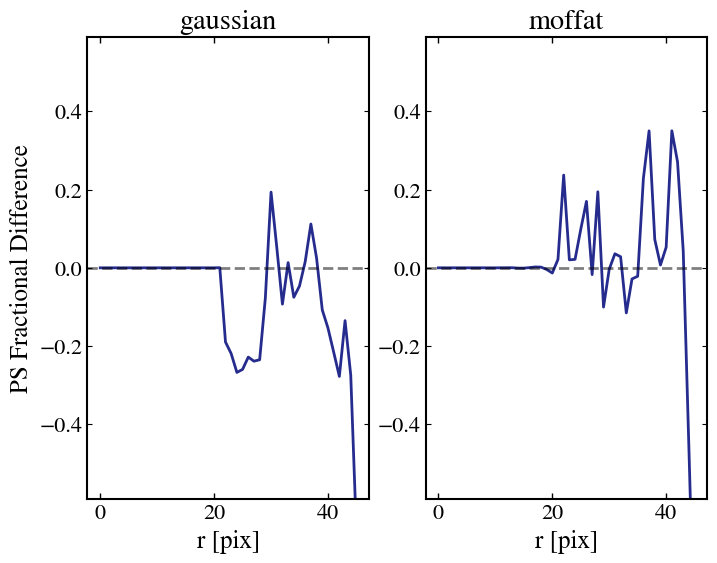

In [5]:
sigma_arcsec = 0.52
fwhm_w = 0.9
fwhm_d = 0.7

fig, axs = plt.subplots(ncols=2, figsize=(8, 6))
for ax, psf_name in zip(axs, ["gaussian", "moffat"]):
    sim = simulate.sim_wide_deep(
        seed=seed, ngrid=ngrid, nstamp=1, scale=scale, flux=1,
        fwhm_w=fwhm_w, fwhm_d=fwhm_d, psf_name=psf_name, fix_psf=False
    )

    sigma_arcsec = deep_anacal.get_max_smooth_scale(fwhm_w=fwhm_w, fwhm_d=fwhm_d, fpfs_config=sigma_arcsec)

    fpfs_config = anacal.fpfs.FpfsConfig(sigma_arcsec=sigma_arcsec)
    task = anacal.fpfs.FpfsTask(
        npix=fpfs_config.npix, pixel_scale=scale, sigma_arcsec=fpfs_config.sigma_arcsec,
        noise_variance=1e-3, kmax_thres=fpfs_config.kmax_thres)

    radial_profile = []
    for field in ['w', 'd']:
        fpfsI = anacal.fpfs.FpfsImage(
            nx=ngrid, ny=ngrid, scale=scale, sigma_arcsec=sigma_arcsec,
            klim=task.kmax / scale,
            psf_array=sim['psf_'+field]
        )
        smooth_image = fpfsI.smooth_image(gal_array=sim['gal_'+field], do_rotate=False)
        ps_image = np.abs(np.fft.fftshift(np.fft.fft2(smooth_image)))
        radial_profile.append(compute_radial_profile(ps_image)[1])
    ax.plot(np.arange(radial_profile[0].shape[0]), radial_profile[0] / radial_profile[1] - 1)
    ax.set_xlabel('r [pix]')
    ax.set_ylim(-0.59, 0.59)
    ax.axhline(c='k', ls='--', alpha=0.5)
    ax.set_title(psf_name)
axs[0].set_ylabel('PS Fractional Difference')

Text(0, 0.5, 'PS Fractional Difference')

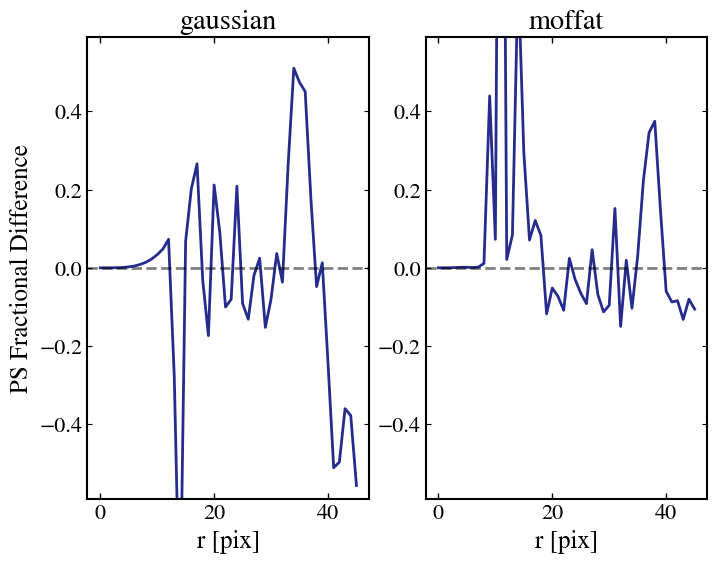

In [6]:
sigma_arcsec = 0.52
fwhm_w = 1.7
fwhm_d = 0.9

fig, axs = plt.subplots(ncols=2, figsize=(8, 6))
for ax, psf_name in zip(axs, ["gaussian", "moffat"]):
    sim = simulate.sim_wide_deep(
        seed=seed, ngrid=ngrid, nstamp=1, scale=scale, flux=1,
        fwhm_w=fwhm_w, fwhm_d=fwhm_d, psf_name=psf_name, fix_psf=False
    )

    sigma_arcsec = deep_anacal.get_max_smooth_scale(fwhm_w=fwhm_w, fwhm_d=fwhm_d, fpfs_config=sigma_arcsec)

    fpfs_config = anacal.fpfs.FpfsConfig(sigma_arcsec=sigma_arcsec)
    task = anacal.fpfs.FpfsTask(
        npix=fpfs_config.npix, pixel_scale=scale, sigma_arcsec=fpfs_config.sigma_arcsec,
        noise_variance=1e-3, kmax_thres=fpfs_config.kmax_thres)

    radial_profile = []
    for field in ['w', 'd']:
        fpfsI = anacal.fpfs.FpfsImage(
            nx=ngrid, ny=ngrid, scale=scale, sigma_arcsec=sigma_arcsec,
            klim=task.kmax / scale,
            psf_array=sim['psf_'+field]
        )
        smooth_image = fpfsI.smooth_image(gal_array=sim['gal_'+field], do_rotate=True)
        ps_image = np.abs(np.fft.fftshift(np.fft.fft2(smooth_image)))
        radial_profile.append(compute_radial_profile(ps_image)[1])
    ax.plot(np.arange(radial_profile[0].shape[0]), radial_profile[0] / radial_profile[1] - 1)
    ax.set_xlabel('r [pix]')
    ax.set_ylim(-0.59, 0.59)
    ax.axhline(c='k', ls='--', alpha=0.5)
    ax.set_title(psf_name)
axs[0].set_ylabel('PS Fractional Difference')